Amit jakhar 
* References Used to Complete the Assignment
    * a. https://www.kaggle.com/code/deepdivelm/nyc-taxi-fares-eda-modelling-2-93
    * b. https://scikit-learn.org/stable/modules/preprocessing.html 
    * c. https://towardsdatascience.com/comparing-sample-distributions-with-the-kolmogorov-smirnov-ks-test-a2292ad6fee5
    * d. https://towardsdatascience.com/comparing-sample-distributions-with-the-kolmogorov-smirnov-ks-test-a2292ad6fee5

...


# Part 1: NY Taxi Fare Prediction

In [112]:
# !pip install -q kaggle

In [113]:
# from google.colab import files
# files.upload()

In [114]:
# !mkdir ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json

In [115]:
# !kaggle competitions download -c new-york-city-taxi-fare-prediction

In [116]:
# !unzip new-york-city-taxi-fare-prediction

In [154]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.metrics import mean_squared_error, r2_score

In [155]:
train = pd.read_csv("./content/train_NYTaxi.csv")
test = pd.read_csv("./content/test_NYTaxi.csv")
train.shape

(100000, 9)

#### PART 1 --> DATA CLEANSING 

Will perform the following activities
1.   Shape of train and test sets
2.   Check for NaNs and drop them (if any)
3.   Check for outliers and drop them (if any)
4.   Type conversion of relevant fields





In [156]:
train.head()

Unnamed: 0                            key  fare_amount  \
0           0    2009-04-08 19:11:10.0000004          4.9   
1           1    2012-07-30 16:19:08.0000003          4.9   
2           2  2011-02-22 13:35:00.000000121          6.9   
3           3    2010-10-07 21:09:35.0000002         14.1   
4           4  2009-10-02 22:51:00.000000140         12.1   

           pickup_datetime  pickup_longitude  pickup_latitude  \
0  2009-04-08 19:11:10 UTC        -73.998287        40.727490   
1  2012-07-30 16:19:08 UTC        -73.966597        40.794345   
2  2011-02-22 13:35:00 UTC        -73.971638        40.763382   
3  2010-10-07 21:09:35 UTC        -74.003545        40.707399   
4  2009-10-02 22:51:00 UTC        -74.004532        40.707465   

   dropoff_longitude  dropoff_latitude  passenger_count  
0         -73.989854         40.735239                2  
1         -73.965682         40.803808                2  
2         -73.953767         40.783715                1  
3         -73.981312         40.750071                1  
4         -73.977908         40.745633                5

In [157]:
# Removing unecessary column
train = train.drop('Unnamed: 0',axis=1)
train.head(5)

key  fare_amount          pickup_datetime  \
0    2009-04-08 19:11:10.0000004          4.9  2009-04-08 19:11:10 UTC   
1    2012-07-30 16:19:08.0000003          4.9  2012-07-30 16:19:08 UTC   
2  2011-02-22 13:35:00.000000121          6.9  2011-02-22 13:35:00 UTC   
3    2010-10-07 21:09:35.0000002         14.1  2010-10-07 21:09:35 UTC   
4  2009-10-02 22:51:00.000000140         12.1  2009-10-02 22:51:00 UTC   

   pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0        -73.998287        40.727490         -73.989854         40.735239   
1        -73.966597        40.794345         -73.965682         40.803808   
2        -73.971638        40.763382         -73.953767         40.783715   
3        -74.003545        40.707399         -73.981312         40.750071   
4        -74.004532        40.707465         -73.977908         40.745633   

   passenger_count  
0                2  
1                2  
2                1  
3                1  
4                5

In [158]:
# Check no of rows & columns in the dataset
print("Shape of the Training data :", train.shape)

# See all the columns in the dataset
print("All columns are :", list(train.columns))

Shape of the Training data : (100000, 8)
All columns are : ['key', 'fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count']


In [159]:
# Check datatypes & count of not-null values in each field
train.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   key                100000 non-null  object 
 1   fare_amount        100000 non-null  float64
 2   pickup_datetime    100000 non-null  object 
 3   pickup_longitude   100000 non-null  float64
 4   pickup_latitude    100000 non-null  float64
 5   dropoff_longitude  100000 non-null  float64
 6   dropoff_latitude   100000 non-null  float64
 7   passenger_count    100000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 6.1+ MB


In [160]:
#check for missing values in train data
# print('Printing number of null values in each columns:\n{}'.format(train.isnull().sum()))

temp_df1 = pd.DataFrame(columns=train.columns)
temp_df2 = pd.DataFrame(columns=train.columns)

for index, row in train.iterrows():
    if pd.isnull(row['dropoff_longitude']) or pd.isnull(row['dropoff_latitude']):
        # temp_df = temp_df.append(row, ignore_index=True)
        temp_df1 = pd.concat([temp_df1, pd.DataFrame(row).T])

for i in range(10):
    temp_df2 = pd.concat([temp_df2, pd.DataFrame(train.iloc[np.random.randint(0,len(train)),:]).T])


print('Rows with NAN values in train file:\n')
temp_df1

Rows with NAN values in train file:



Empty DataFrame
Columns: [key, fare_amount, pickup_datetime, pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude, passenger_count]
Index: []

In [161]:
print('Randomly selected rows:\n')
temp_df2

Randomly selected rows:



key fare_amount          pickup_datetime  \
70746    2015-04-28 22:31:13.0000004         5.5  2015-04-28 22:31:13 UTC   
49412    2015-06-05 22:33:08.0000005         9.5  2015-06-05 22:33:08 UTC   
2397   2012-03-22 22:05:00.000000230         8.9  2012-03-22 22:05:00 UTC   
63124   2012-11-30 08:25:00.00000095         5.0  2012-11-30 08:25:00 UTC   
15287  2009-07-31 10:34:00.000000176        10.5  2009-07-31 10:34:00 UTC   
45096    2014-05-10 20:41:14.0000002         7.0  2014-05-10 20:41:14 UTC   
54270    2011-04-13 21:35:18.0000003        10.5  2011-04-13 21:35:18 UTC   
94879   2009-09-10 00:07:00.00000022        33.7  2009-09-10 00:07:00 UTC   
86547    2015-02-19 17:29:26.0000005         8.5  2015-02-19 17:29:26 UTC   
6039   2010-01-21 17:14:00.000000145        14.5  2010-01-21 17:14:00 UTC   

      pickup_longitude pickup_latitude dropoff_longitude dropoff_latitude  \
70746       -73.981506       40.768192        -73.966682        40.762325   
49412       -73.983238       40.738483        -73.984825        40.721863   
2397         -74.00605       40.740007        -73.983608         40.73893   
63124        -73.98055       40.748117        -73.977052        40.752145   
15287       -73.946272       40.772785        -73.971702        40.762957   
45096       -73.979142        40.74704         -73.97962         40.73481   
54270       -73.968091       40.800625        -73.979065        40.763841   
94879       -73.970572       40.752243        -73.955763        40.600513   
86547       -73.961632       40.779812        -73.982384        40.775864   
6039        -73.958615       40.815207        -73.984087        40.763135   

      passenger_count  
70746               2  
49412               1  
2397                2  
63124               1  
15287               5  
45096               1  
54270               1  
94879               5  
86547               2  
6039                5

In [162]:
#check for missing values in test data
print('Number of NAN values in each columns in test file:\n{}'.format(test.isnull().sum()))

Number of NAN values in each columns in test file:
key                  0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64


In [163]:
#drop the missing values
def drop_null(df):
    df.dropna()
    return df
    
train = drop_null(train)
test = drop_null(test)

print('Number of NAN values in each columns of train file:\n{}'.format(train.isnull().sum()))
print()
print('Number of NAN values in each columns of test file:\n{}'.format(test.isnull().sum()))

Number of NAN values in each columns of train file:
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

Number of NAN values in each columns of test file:
key                  0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64


In [164]:
#check the target column
fare_col = train['fare_amount']
print('Statistical summary of fare amount:\n')
fare_col.describe()

Statistical summary of fare amount:



count    100000.000000
mean         11.333564
std           9.810826
min          -9.300000
25%           6.000000
50%           8.500000
75%          12.500000
max         394.000000
Name: fare_amount, dtype: float64

In [165]:
#Look for no. of non-positive fare_amount values.

print('Number of instances where fare amount was 0: {}'.format(sum(train['fare_amount']==0)))
print('Number of instances where fare amount was less than 0: {}'.format(sum(train['fare_amount']<0)))
print('Number of instances where fare amount was non-positive: {}'.format(sum(train['fare_amount']<=0)))

Number of instances where fare amount was 0: 3
Number of instances where fare amount was less than 0: 3
Number of instances where fare amount was non-positive: 6


In [166]:
# Remove the non-positive fare_amount values, and latitude and longitude values which were accidentally swapped in the data.
def drop_anomaly(df):
    df = df[df['fare_amount']>0]
    df = df[df['pickup_longitude']<=0]
    df = df[df['dropoff_longitude']<=0]
    df = df[df['pickup_latitude']>=0]
    df = df[df['dropoff_latitude']>=0]
    df = df[df['passenger_count']>0]

    return df

print('Length of data frame before dropping anomalistic data: {}'.format(len(train)))
train = drop_anomaly(train)
print('Number of instances where fare amount was non-positive: {}'.format(sum(train['fare_amount']<=0)))
print('Length of data frame after dropping anomalistic data: {}'.format(len(train)))

Length of data frame before dropping anomalistic data: 100000
Number of instances where fare amount was non-positive: 0
Length of data frame after dropping anomalistic data: 99564


**Removing outliers**

Procedure followed:
*   Visualizing fare amount distribution
*   Gaussian fitting of data
*   Identifying and removing outliers

In [167]:
def gaussian_fit(data):
    data = np.array(data)
    mu = np.mean(data)
    sig = np.std(data)
    sig = [sig, 1][int(sig==0)]
    return (data-mu)/sig

/home/gauranshu/anaconda3/envs/denv/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:>

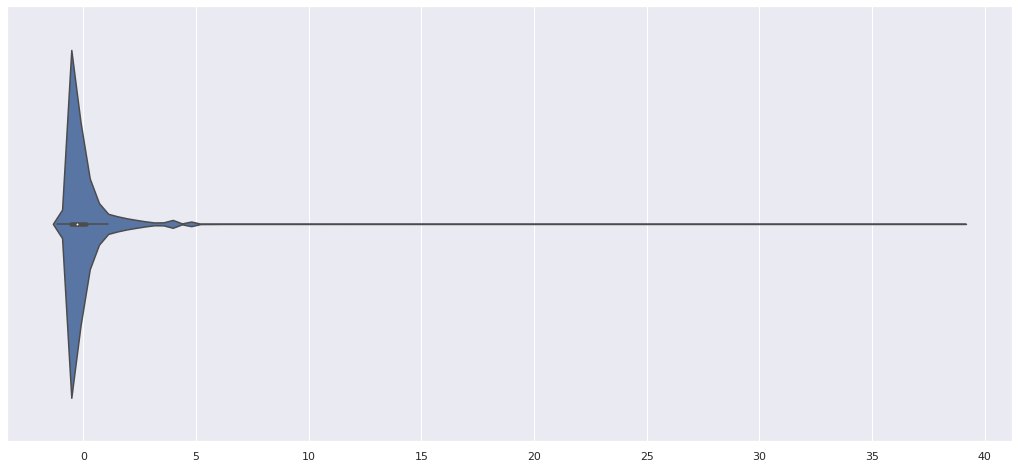

In [168]:
sns.set(rc = {'figure.figsize':(18,8)})
sns.violinplot(gaussian_fit(train["fare_amount"]))

In [169]:
def remove_outliers(df, col, remove_from = 2):
    # "s" stands for step size

    arr = gaussian_fit(df[col].values)
    n = len(arr)
    s = 0
    left_lim = -4

    # Finding left side limit beyond which lies 1.5% of the data
    while s<1.5:
        s = 100*sum(arr<left_lim)/n
        left_lim += 0.1
    left_lim += -0.2

    # Finding right side limit beyond which lies 1.5% of the data
    s = 0
    right_lim = 4
    while s<1.5:
        s = 100*sum(arr>right_lim)/n
        right_lim += -0.1
    right_lim += 0.2

    if remove_from==2:
        # to remove outliers from both sides
        df = df[[(x>left_lim and x<right_lim) for x in arr]]
    elif remove_from==1:
        # to remove outliers from right side
        df = df[arr<right_lim]
    else:
        # to remove outliers from left side
        df = df[arr>left_lim]
    return df

Length before dropping outliers: 99564
Length after dropping outliers: 97928


/home/gauranshu/anaconda3/envs/denv/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



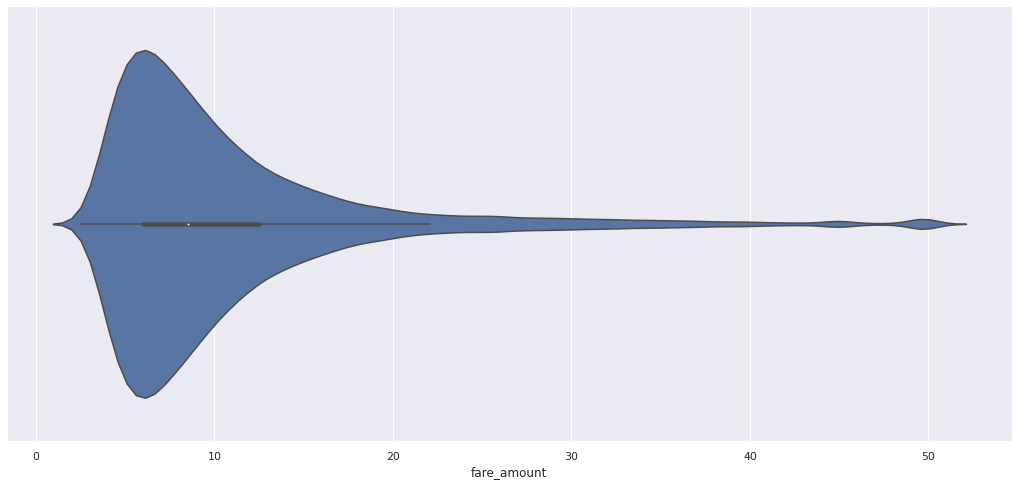

In [170]:
print('Length before dropping outliers: {}'.format(len(train)))
train = remove_outliers(train, 'fare_amount')
print('Length after dropping outliers: {}'.format(len(train)))
sns.violinplot(train["fare_amount"]);

**Next let us explore the pickup latitude and longitudes**, 

Googling gave me this info
*   Latitudes range from -90 to 90.
*   Longitudes range from -180 to 180.

The above describe clearly shows some outliers. Let's filter them


Check the data types of each column

In [171]:
train.dtypes

key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

key and pickup_datetime seem to be datetime columns which are in object format. Let's convert them to datetime

In [172]:
train['key'] = pd.to_datetime(train['key'])
train['pickup_datetime']  = pd.to_datetime(train['pickup_datetime'])

In [173]:
#Convert for test data
test['key'] = pd.to_datetime(test['key'])
test['pickup_datetime']  = pd.to_datetime(test['pickup_datetime'])

In [174]:
#check the dtypes after conversion
train.dtypes

key                       datetime64[ns]
fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object

In [175]:
test.dtypes

key                       datetime64[ns]
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object

Now, for **EDA**. The following are my considerations - 
1. Does the number of passengers affect the fare? 
2. Does the date and time of pickup affect the fare?
3. Does the day of the week affect the fare?
4. Does the distance travelled affect the fare?

First, let's split the datetime field 'pickup_datetime' to the following - 
* year
* month
* date
* hour
* day of week

Using these we shall calculate the day of the week and come to our conclusions about how pickup_location affects the fare.
Also, create a new field 'distance' to fetch the distance between the pickup and the drop.

We can calulate the distance in a sphere when latitudes and longitudes are given by [Haversine formula](https://en.wikipedia.org/wiki/Haversine_formula)

**haversine(θ) = sin²(θ/2)**

Eventually, the formual boils down to the following where φ is latitude, λ is longitude, R is earth’s radius (mean radius = 6,371km) to include latitude and longitude coordinates (A and B in this case).

**a = sin²((φB - φA)/2) + cos φA . cos φB . sin²((λB - λA)/2)**

**c = 2 * atan2( √a, √(1−a) )**

**d = R ⋅ c**

**d = Haversine distance**

*Refer [this](https://community.esri.com/groups/coordinate-reference-systems/blog/2017/10/05/haversine-formula) page for more info and examples on Haversine formula*

Is this distance equal to the road travel distance? Do we have to do something else?


In [176]:
def haversine_distance(lat1, long1, lat2, long2):
    data = [train, test]
    for i in data:
        R = 6371  #radius of earth in kilometers
        phi1 = np.radians(i[lat1])
        phi2 = np.radians(i[lat2])
    
        delta_phi = np.radians(i[lat2]-i[lat1])
        delta_lambda = np.radians(i[long2]-i[long1])
    
        #a = sin²((φB - φA)/2) + cos φA . cos φB . sin²((λB - λA)/2)
        a = np.sin(delta_phi / 2.0) ** 2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda / 2.0) ** 2
    
        #c = 2 * atan2( √a, √(1−a) )
        c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    
        #d = R*c
        d = (R * c) #in kilometers
        i['H_Distance'] = d

    return d

def manhattan_distance(lat1, long1, lat2, long2):
    data = [train, test]
    for i in data:
        dist = abs(i[lat1]-i[lat2])+abs(i[long1]-i[long2]) # distance in degrees
        dist *= 111  # distance in kilometers
        i['M_Distance'] = dist * 111
    return dist

def remove_null_distance(df):
    df = df[df['M_Distance']>=1]
    df = df[df['H_Distance']>=1]
    return df

In [177]:
haversine_distance('pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude')

0        2.323260
1        2.425353
2        0.618628
3        1.961033
4        5.387301
          ...    
9909     2.124874
9910     3.270969
9911    19.183941
9912     8.343486
9913     1.180825
Length: 9914, dtype: float64

In [178]:
manhattan_distance('pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude')

0        3.116879
1        3.534382
2        0.887001
3        2.826060
4        7.533237
          ...    
9909     3.229088
9910     4.654358
9911    31.241615
9912    12.509010
9913     1.932541
Length: 9914, dtype: float64

In [179]:
# Removing all zero distances from the data
train = remove_null_distance(train)

Removing outlying H_Distance (M_distance is directly related to H_Distance, so outliers in M_Distance will get removed along with H_Distance)

/home/gauranshu/anaconda3/envs/denv/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:>

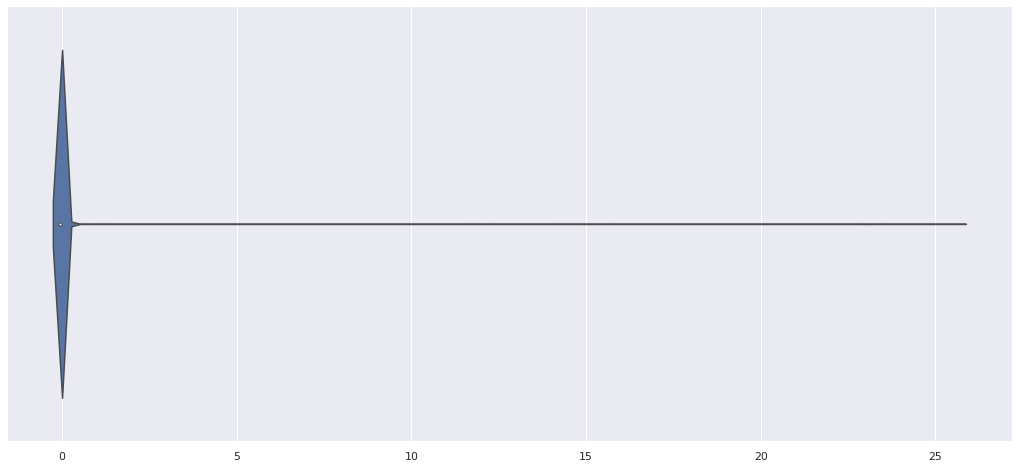

In [180]:
# Visualizing Haversine distance distribution
sns.violinplot(gaussian_fit(train["H_Distance"]))

/home/gauranshu/anaconda3/envs/denv/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='H_Distance'>

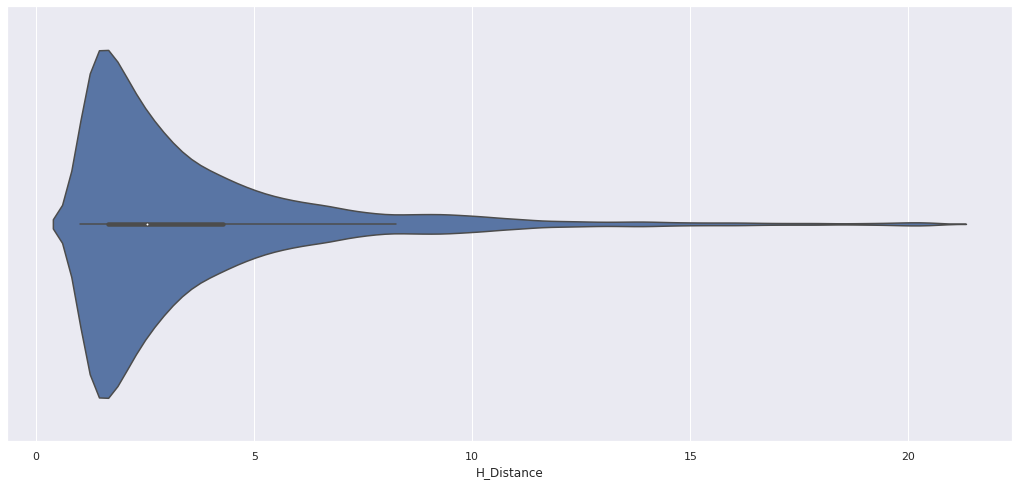

In [181]:
train = remove_outliers(train, 'H_Distance', 1)
sns.violinplot(train["H_Distance"])

Now that we have calculated the distance, we shall create columns for the following -


*   year
*   month
*   date
*   hour
*   day of week






In [182]:
data = [train,test]
for i in data:
    i['Year'] = i['pickup_datetime'].dt.year
    i['Month'] = i['pickup_datetime'].dt.month
    i['Date'] = i['pickup_datetime'].dt.day
    i['Day of Week'] = i['pickup_datetime'].dt.dayofweek
    i['Hour'] = i['pickup_datetime'].dt.hour

In [183]:
# Fare per person
def fare_p_person(df):
    df['fare_per_person'] = df['fare_amount']/df['passenger_count']
    return train

# Fare per kilometer
def fare_p_km(df):
    df['fare_per_hkm'] = df['fare_amount']/df['H_Distance']
    df['fare_per_mkm'] = df['fare_amount']/df['M_Distance']

    return train

# Fare per person per kilometer
def fare_p_km_pp(df):
    df['fare_per_hkm_pp'] = df['fare_per_person']/df['H_Distance']
    df['fare_per_mkm_pp'] = df['fare_per_person']/df['M_Distance']
    return train

train = fare_p_person(train)
train = fare_p_km(train)
train = fare_p_km_pp(train)

In [184]:
train.head()

key  fare_amount           pickup_datetime  \
0 2009-04-08 19:11:10.000000400          4.9 2009-04-08 19:11:10+00:00   
1 2012-07-30 16:19:08.000000300          4.9 2012-07-30 16:19:08+00:00   
2 2011-02-22 13:35:00.000000121          6.9 2011-02-22 13:35:00+00:00   
3 2010-10-07 21:09:35.000000200         14.1 2010-10-07 21:09:35+00:00   
4 2009-10-02 22:51:00.000000140         12.1 2009-10-02 22:51:00+00:00   

   pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0        -73.998287        40.727490         -73.989854         40.735239   
1        -73.966597        40.794345         -73.965682         40.803808   
2        -73.971638        40.763382         -73.953767         40.783715   
3        -74.003545        40.707399         -73.981312         40.750071   
4        -74.004532        40.707465         -73.977908         40.745633   

   passenger_count  H_Distance  M_Distance  Year  Month  Date  Day of Week  \
0                2    1.116850  199.378422  2009      4     8            2   
1                2    1.055053  127.867338  2012      7    30            0   
2                1    2.715959  470.711484  2011      2    22            1   
3                1    5.101370  799.694505  2010     10     7            3   
4                5    4.800593  798.302232  2009     10     2            4   

   Hour  fare_per_person  fare_per_hkm  fare_per_mkm  fare_per_hkm_pp  \
0    19             2.45      4.387340      0.024576         2.193670   
1    16             2.45      4.644318      0.038321         2.322159   
2    13             6.90      2.540539      0.014659         2.540539   
3    21            14.10      2.763963      0.017632         2.763963   
4    22             2.42      2.520522      0.015157         0.504104   

   fare_per_mkm_pp  
0         0.012288  
1         0.019160  
2         0.014659  
3         0.017632  
4         0.003031

Plotting distance values against fare amounts

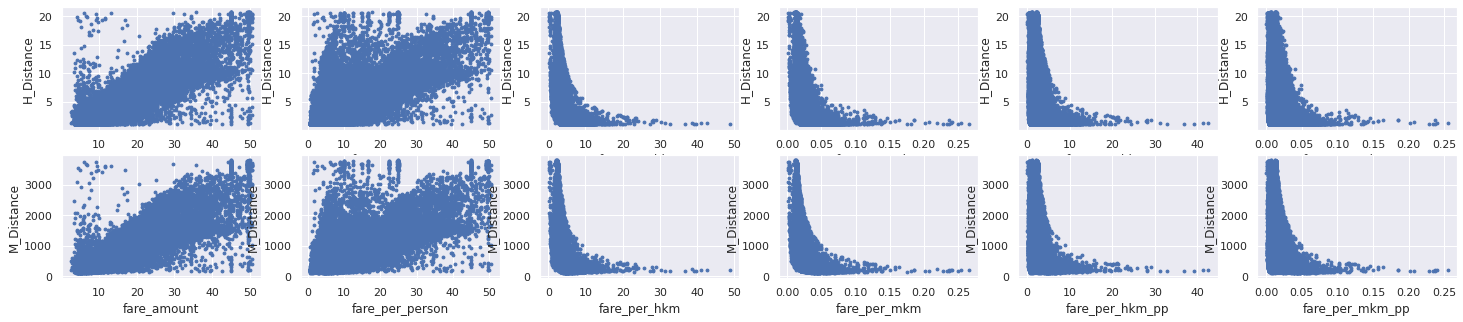

In [185]:
n_rows = 2
n_cols = 6
Xs = [
    'fare_amount',
    'fare_per_person',
    'fare_per_hkm',
    'fare_per_mkm',
    'fare_per_hkm_pp',
    'fare_per_mkm_pp'
]
Ys = [
    'H_Distance',
    'M_Distance',
]

fig = plt.figure(figsize=(25,5))
for i in range(n_rows*n_cols):
    plt.subplot(n_rows, n_cols, i+1)
    plt.scatter(train[Xs[i%n_cols]], train[Ys[i//n_cols]], s=8)
    plt.xlabel(Xs[i%n_cols])
    plt.ylabel(Ys[i//n_cols])

<AxesSubplot:>

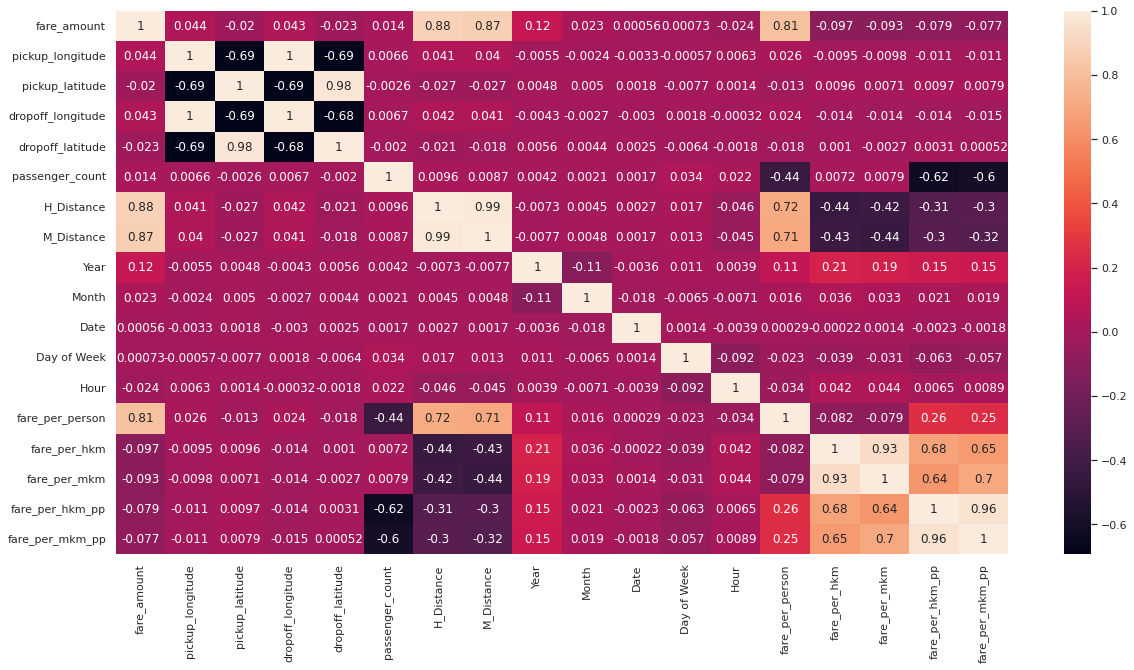

In [186]:
sns.set(rc = {'figure.figsize':(20,10)})
sns.heatmap(train.corr(), annot=True)

**1. Does the number of passengers affect the fare?**

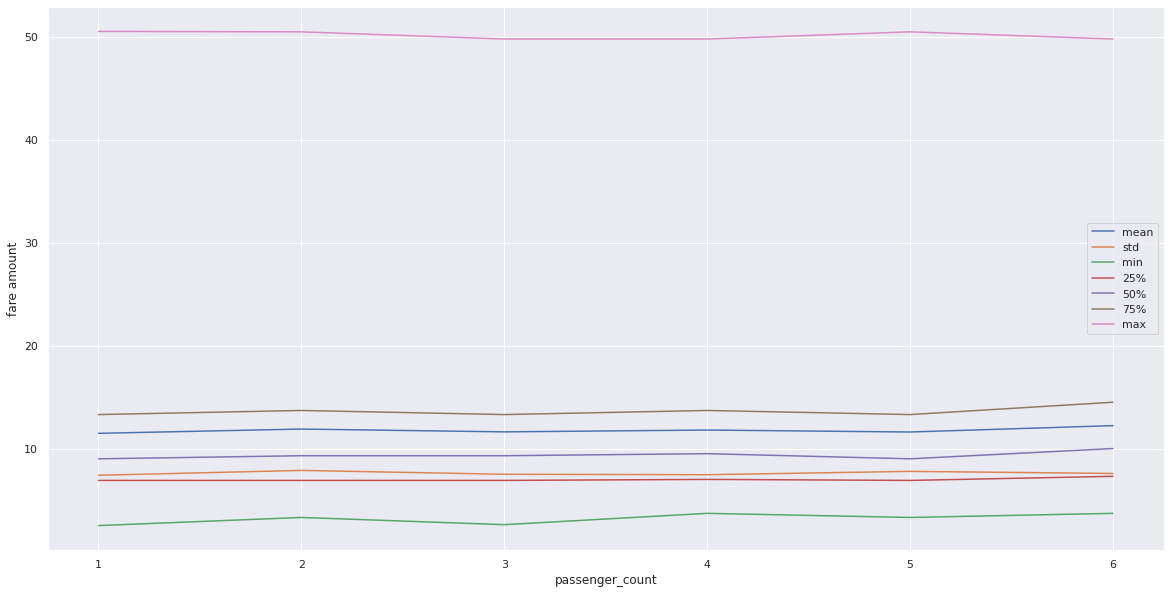

In [187]:
temp_df = train.groupby(['passenger_count']).describe()['fare_amount'].drop('count',axis=1)
temp_df.plot()
plt.ylabel('fare amount')
plt.show()

* Correlation between passengers count and fare amount is almost 0, and so, are roughly independent of each other.
* Also, the curve between passenger count and fare amount is linear in every aspect

**2. Does the date and time of pickup affect the fare?**

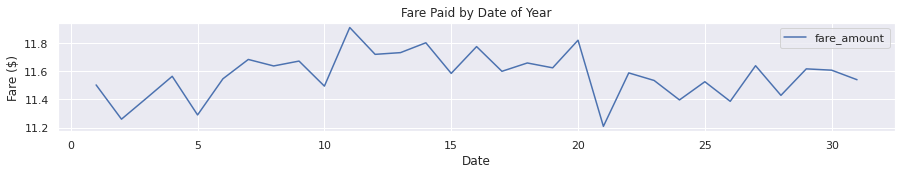

In [188]:
train.pivot_table('fare_amount', index='Date').plot(figsize=(15,2))
plt.title('Fare Paid by Date of Year')
plt.ylabel('Fare ($)')
plt.xlabel('Date')
plt.show()

A rough fortnightly cycle of prices could be seen in graph above.

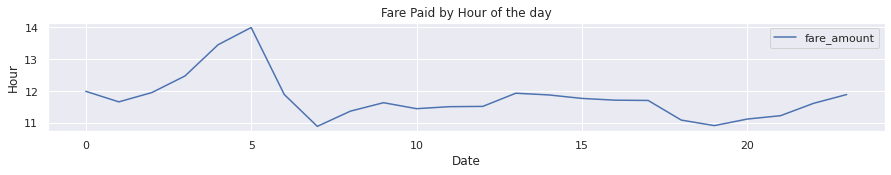

In [189]:
train.pivot_table('fare_amount', index='Hour').plot(figsize=(15,2))
plt.title('Fare Paid by Hour of the day')
plt.ylabel('Hour')
plt.xlabel('Date')
plt.show()

Prices peaked at 0500 hour, preceded by high prices during midnight.

**3. Does the day of the week affect the fare?**

Text(0.5, 0, 'Day')

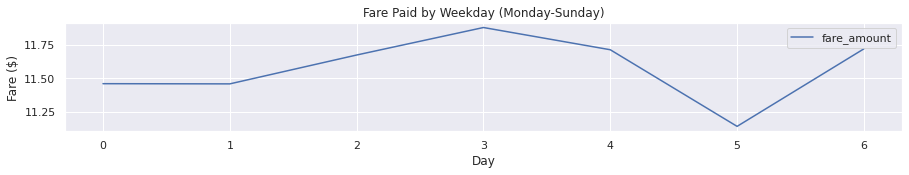

In [190]:
train.pivot_table('fare_amount', index='Day of Week').plot(figsize=(15,2))
plt.title('Fare Paid by Weekday (Monday-Sunday)')
plt.ylabel('Fare ($)')
plt.xlabel('Day')

Prices peaked on wednesdays, and were high on sundays, suggeseting weekend trips.

**4. Does the distance affect the fare?**

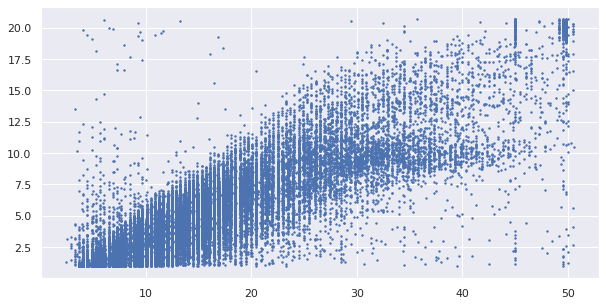

In [191]:
fig = plt.figure(figsize=(10,5))
plt.scatter(train['fare_amount'], train['H_Distance'], s=2)
plt.show()

Distance is clearly affecting the fare amount

#### Part B: Data Scaling

1. Defining range_scaler on the basis of a function with name (sklearn.preprocessing.MinMaxScaler) to scale fit ordinal data in a range
2. Defining standard_scaler on the basis of a function with name (sklearn.preprocessing.StandardScaler) to normalize continuous data


In [192]:
# REFERENCE FROM:
# https://scikit-learn.org/stable/modules/preprocessing.html

# MinMaxScaler
def range_scaler(l, m=-1, M=1):
    l = np.array(l)
    a, b = l.min(), l.max()
    return (M-m)*(l-a)/(b-a)+m

# Standard Scaler
def standard_scaler(l, m=-1, M=1):
    if len(l.shape)==1:
        l = np.array(l)
        mu = np.mean(l)
        sig = np.std(l)
        sig = [sig, 1][sig==0]
        return (l-mu)/sig
    else:
        for col in l.columns:
            if col=='fare_amount':continue
            l[col] = standard_scaler(l[col].values)
        return l

In [70]:
# D
for col in ['H_Distance', 'M_Distance', 'passenger_count', 'Year', 'Month', 'Date', 'Day of Week', 'Hour']:
    train[col] = standard_scaler(train[col])

/tmp/ipykernel_2018/1710955940.py:14: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  sig = [sig, 1][sig==0]


#### Part C: Building a Pipeline

In [193]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor

# Class to remove anomalies
class RemoveAnomaly:
    def fit(self):pass
    def transform(self, df):
        df = df.dropna()
        try:
            df = df[df['fare_amount']>0]
        except:
            pass
        df = df[df['pickup_longitude']<=0]
        df = df[df['dropoff_longitude']<=0]
        df = df[df['pickup_latitude']>=0]
        df = df[df['dropoff_latitude']>=0]
        df = df[df['passenger_count']>0]

        # Adding haversine distance
        R = 6371
        phi1 = np.radians(df['pickup_latitude'])
        phi2 = np.radians(df['dropoff_latitude'])
    
        delta_phi = np.radians(df['dropoff_latitude']-df['pickup_latitude'])
        delta_lambda = np.radians(df['dropoff_longitude']-df['pickup_longitude'])
    
        a = np.sin(delta_phi / 2.0) ** 2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda / 2.0) ** 2
    
        c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    
        d = (R * c)
        df['H_Distance'] = d
        df = df[df['H_Distance']>0.5]
        return df

# Class to remove outliers
class RemoveOutlier:
    def fit(self):pass
    def transform(self, df):
        df = remove_outliers(df, 'fare_amount')
        df = remove_outliers(df, 'H_Distance', 1)
        return df

# Making new columns for date, time etc.
class SelectFeatures:
    def fit(self):pass
    def transform(self, df):
        df['key'] = pd.to_datetime(df['key'])
        df['pickup_datetime']  = pd.to_datetime(df['pickup_datetime'])
        df['Year'] = df['pickup_datetime'].dt.year
        df['Month'] = df['pickup_datetime'].dt.month
        df['Date'] = df['pickup_datetime'].dt.day
        df['Day of Week'] = df['pickup_datetime'].dt.dayofweek
        df['Hour'] = df['pickup_datetime'].dt.hour
        df = df.reset_index()
        try:
            df = df.drop(['Unnamed: 0', 'index', 'key', 'pickup_datetime'], axis=1)
        except:
            pass
        # df = df.drop(['Unnamed: 0', 'key', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'Month', 'Date', 'Day of Week', 'Hour'], axis=1)

        return df

# Standard Scaling of data
class Transform:
    def fit(self):pass
    def transform(self, df):
        data_scaler = {}
        for col in df.columns:
            data_scaler[col] = StandardScaler()
            data_scaler[col].fit(df[[col]].values)
        return data_scaler, df

pipe = Pipeline([
    ('anomaly remover', RemoveAnomaly()),
    ('outlier remover', RemoveOutlier()),
    ('features selection', SelectFeatures()),
    ('transform', Transform())
])

In [194]:
data = pd.read_csv("./content/train_NYTaxi.csv")
data_scaler, data = pipe.transform(data)
print('Shape of resulting dataframe:', data.shape) 
data.sample(n=5)



Shape of resulting dataframe: (91499, 12)


fare_amount  pickup_longitude  pickup_latitude  dropoff_longitude  \
67828         10.1        -73.978148        40.749277         -74.006883   
71786          8.5        -73.963367        40.771760         -73.975102   
70584          9.0        -73.978552        40.761813         -73.959552   
16633          8.1        -73.981045        40.765660         -73.987044   
4837           9.0        -73.982887        40.739350         -73.983052   

       dropoff_latitude  passenger_count  H_Distance  Year  Month  Date  \
67828         40.740712                1    2.601353  2010     11    10   
71786         40.750488                1    2.563529  2010     11    24   
70584         40.777530                1    2.369473  2014      3    21   
16633         40.745363                1    2.312797  2012      5    16   
4837          40.756660                5    1.924834  2013      2     8   

       Day of Week  Hour  
67828            2    19  
71786            2    11  
70584            4    13  
16633            2    22  
4837             4     9

#### Part D: Use of Validation Set and Cross Validation Approach

In [195]:
# Using 'k' regions of data to train a rough model to estimate coefficients of different featuers

k = 10
data_len = len(data)
validation_len = data_len//k
coeff_list = [] # list to store all learnt coefficients in different validation steps
for i in range(k):
    train = data.loc[range(i*validation_len, (i+1)*validation_len), :]
    train_x = train.loc[:, train.columns!='fare_amount']
    train_y = train[['fare_amount']]

    model = linear_model.LinearRegression()
    model.fit(train_x, train_y)
    coeff_list += [model.coef_]

for i in range(len(coeff_list)):
    coeff_list[i]=coeff_list[i][0]
coeff_list = np.array(coeff_list)
coeff_list = coeff_list.T

In [196]:
# measuring distance of mean of each distribution of coefficiens w.r.t. its standard deviations

quality_metric = []
for i in range(len(coeff_list)):
    mu = coeff_list[i].mean()
    std = coeff_list[i].std()
    std = max(std, 1e-9)
    std_len = mu/std
    quality_metric += [abs(std_len)]

print('Distance of mean from zero in terms of standard deviation of its distribution\n')
for i in range(len(quality_metric)):
    print(f'{train_x.columns[i]}: {quality_metric[i]}')

Distance of mean from zero in terms of standard deviation of its distribution

pickup_longitude: 3.4568863279875837
pickup_latitude: 4.655291319041051
dropoff_longitude: 0.4645053585953811
dropoff_latitude: 3.7535626769710944
passenger_count: 2.007480775826737
H_Distance: 57.92361909504577
Year: 28.004786505476975
Month: 9.637245210189521
Date: 0.010353236106709254
Day of Week: 4.182118982041102
Hour: 4.09098082023447


In [197]:
# Selecting top 3 features with most distant means

feature_index = []
for i in range(3):
    j = np.argmax(quality_metric)
    print(j, quality_metric[j])
    quality_metric[j] = -1
    feature_index += [j]

5 57.92361909504577
6 28.004786505476975
7 9.637245210189521


In [198]:
print('Selected Features:')
selected_features = train_x.columns[feature_index].tolist()
targets = ['fare_amount']
for col in selected_features+targets:
    data[col] = data_scaler[col].transform(data[[col]].values)
selected_features

Selected Features:


['H_Distance', 'Year', 'Month']

#### Part E: Linear Regression

In [199]:
class MatrixBasedRegression:
    def __init__(self,X=None,y=None):
        self.X=None
        self.y=None
        self.intercept_=None
        self.coef_=None

    def fit(self, X, Y):
        self.X = X
        self.Y = Y
        X = np.hstack((np.ones((len(X),1)),X))
        self.n, self.d = self.X.shape
        X_dagger = np.linalg.pinv(X)
        self.w = X_dagger@Y
        self.intercept_ = self.w[0]
        self.coef_ = self.w[1:]

    def predict(self, X):
        X = np.array(X)
        if len(X.shape)==1:
            X = np.array([X])
        X = np.hstack((np.ones((len(X),1)),X))
        return X@self.w

In [201]:
class StochasticLinearRegression:
    def __init__(self,X=None,y=None, lr=0.00001, epochs = 50):
        self.X=None
        self.y=None
        self.intercept_=None
        self.coef_=None
        self.lr = lr
        self.epochs = epochs

    def fit(self, X=None, y=None):
        if type(X)!=None:
            self.X = X
        if type(y)!=None:
            self.y = y
        self.X = np.hstack((np.ones((len(self.X),1)),self.X))
        n, d = X.shape
        self.w = np.random.randn(d+1)*0.1

        for j in range(self.epochs):
            print(f'\rCurrenlty on epoch: {j+1}\tLoss: {mean_squared_error(self.predict(X), self.y)}\r', end='')
            for i in range(n):
                self.w += self.lr*2*(self.y[i] - self.X[i]*self.w)@self.X[i]


        self.intercept_ = self.w[0]
        self.coef_ = self.w[1:]

    def predict(self, X):
        X = np.array(X)
        if len(X.shape)==1:
            X = np.array([X])
        X = np.hstack((np.ones((len(X),1)),X))
        return X@self.w

# X = data[selected_features].values
# y = data[targets].values

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# StochasticLinearRegression().fit(X_train, y_train).predict(X_test, y_test)

K-Fold Cross Validation score testing

In [203]:
k = 10
data_len = len(data)
validation_len = data_len//k
for i in range(k):
    test = data.loc[range(i*validation_len, (i+1)*validation_len), :]
    test_x = test.loc[:, test.columns!='fare_amount']
    test_x = test_x.loc[:, selected_features]
    test_y = test[['fare_amount']]

    train = data.loc[[*range(0,i*validation_len)]+[*range((i+1)*validation_len,data_len)], :]
    train_x = train.loc[:, train.columns!='fare_amount']
    train_x = train_x.loc[:, selected_features]
    train_y = train[['fare_amount']]

    model = linear_model.LinearRegression()
    model.fit(train_x, train_y)
    print(f'\nValidation set no.: {i+1}')
    print('Score:', model.score(test_x, test_y))
    print('Loss:', mean_squared_error(model.predict(test_x), test_y))


Validation set no.: 1
Score: 0.7957242767251701
Loss: 0.2088251634608812

Validation set no.: 2
Score: 0.8057064047746748
Loss: 0.1913913947307699

Validation set no.: 3
Score: 0.776112637050238
Loss: 0.2178348472930066

Validation set no.: 4
Score: 0.7827180814303876
Loss: 0.21368670911906126

Validation set no.: 5
Score: 0.7817282803920342
Loss: 0.22954911131356903

Validation set no.: 6
Score: 0.7810667700572291
Loss: 0.23334139586586847

Validation set no.: 7
Score: 0.773352809225494
Loss: 0.22043489814138062

Validation set no.: 8
Score: 0.7949398759118137
Loss: 0.18880115131742028

Validation set no.: 9
Score: 0.8045254845116246
Loss: 0.20098710187889177

Validation set no.: 10
Score: 0.782391461694248
Loss: 0.21665865756720445


In [204]:
def check_model(X_cols, y_cols):
    X = data[X_cols].values
    y = data[y_cols].values

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

    models = [
        {'name': 'Matrix Based Model','model': MatrixBasedRegression()},
        {'name': 'Stochastic Gradient Descent','model': StochasticLinearRegression()},
        {'name': 'Linear Regression','model': linear_model.LinearRegression()},
        {'name': 'Ridge Regression','model': linear_model.Ridge(alpha=.1)},
        {'name': 'KNN model','model': KNeighborsRegressor()}
    ]

    for model in models:
        print('Currently training {} model'.format(model['name']))
        model['model'].fit(X_train, y_train)
        print('Loss on training set:', mean_squared_error(model['model'].predict(X_train), y_train))
        print('Score on validation set:', r2_score(model['model'].predict(X_test), y_test))
        print('\n'+'+'*20+'\n')

    return models

In [205]:
models = check_model(selected_features, targets)

Currently training Matrix Based Model model
Loss on training set: 0.21339691121629925
Score on validation set: 0.7415948323631746

++++++++++++++++++++

Currently training Stochastic Gradient Descent model
Loss on training set: 0.77152019568098656809861
Score on validation set: -4.530505312000869

++++++++++++++++++++

Currently training Linear Regression model
Loss on training set: 0.21339691121629922
Score on validation set: 0.7415948323631744

++++++++++++++++++++

Currently training Ridge Regression model
Loss on training set: 0.213396911218422
Score on validation set: 0.7415939838591779

++++++++++++++++++++

Currently training KNN model model
Loss on training set: 0.1519998171366864
Score on validation set: 0.7446580218420666

++++++++++++++++++++



Estimating values for test file

In [206]:
test_pipe = Pipeline([
    ('anomaly remover', RemoveAnomaly()),
    ('features selection', SelectFeatures()),
])

In [207]:
test_data = pd.read_csv('content/test.csv')
test_data = test_pipe.transform(test_data)
test_data = test_data.drop([x for x in test_data.columns if x not in selected_features], axis=1)
for col in test_data.columns:
    test_data[col] = data_scaler[col].transform(test_data[[col]])
test_data.sample(n=5)

/home/gauranshu/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning:

X has feature names, but StandardScaler was fitted without feature names

/home/gauranshu/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning:

X has feature names, but StandardScaler was fitted without feature names

/home/gauranshu/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning:

X has feature names, but StandardScaler was fitted without feature names



H_Distance      Year     Month
2221   -0.628084  1.211427  0.214983
8134    5.986567 -0.396847 -0.076086
6849    0.976978 -0.932938  0.506053
8092   -0.912416 -0.396847 -0.949295
3900   -0.558664  1.211427  1.670331

In [209]:
# Storing estimations for test file

NY_Taxi_fare_results = {'result': models[0]['model'].predict(test_data.values)}
NY_Taxi_fare_results['result'] = data_scaler['fare_amount'].inverse_transform(NY_Taxi_fare_results['result']).T[0]
result_df = pd.DataFrame(data=NY_Taxi_fare_results)
result_df.to_csv('NY_Taxi_fare_results.csv')

# Start of Part 2: Life Expectancy prediction

In [217]:
# Loading Data

life_epxec_data = pd.read_csv('content/Life Expectancy Data.csv')
print('Shape of the dataframe:', life_epxec_data.shape)
print('Columns:', life_epxec_data.columns)
life_epxec_data.sample(n=10)

Shape of the dataframe: (2938, 22)
Columns: Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')


Country  Year      Status  Life expectancy   \
1703  Micronesia (Federated States of)  2011  Developing              68.9   
667                               Cuba  2005  Developing              77.2   
2308                      Sierra Leone  2004  Developing              42.3   
996                            Germany  2013   Developed              86.0   
407                       Burkina Faso  2008  Developing              56.1   
201                         Bangladesh  2006  Developing              68.2   
2198  Saint Vincent and the Grenadines  2001  Developing              79.0   
1268                            Israel  2013  Developing              82.1   
1760                           Morocco  2003  Developing              69.9   
2918                            Zambia  2003  Developing              46.4   

      Adult Mortality  infant deaths  Alcohol  percentage expenditure  \
1703            169.0              0     1.89                0.000000   
667              19.0              1     4.48              518.935922   
2308            496.0             30     3.99               38.524548   
996              71.0              2    10.94              895.877950   
407             288.0             45     4.50              107.798834   
201             152.0            164     0.01               42.330455   
2198            186.0              0     4.73                0.000000   
1268             61.0              1     2.69             4279.895512   
1760            146.0             24     0.58               88.165062   
2918             64.0             39     2.33               65.789974   

      Hepatitis B  Measles   ...  Polio  Total expenditure  Diphtheria   \
1703         83.0         0  ...   83.0              13.76         84.0   
667          95.0         0  ...   99.0               9.39         89.0   
2308          NaN         7  ...   69.0              11.66         65.0   
996          88.0      1771  ...   94.0              11.16         95.0   
407          93.0       395  ...   92.0               6.77         93.0   
201          86.0      6192  ...   95.0               2.80         94.0   
2198          NaN         0  ...   99.0               3.64         99.0   
1268         97.0        50  ...   96.0               7.89         96.0   
1760          9.0     10841  ...   91.0               5.25         91.0   
2918          NaN       881  ...   85.0               8.18         83.0   

       HIV/AIDS           GDP  Population   thinness  1-19 years  \
1703        0.1           NaN         NaN                    0.2   
667         0.1   3779.577000         NaN                    3.4   
2308        2.1    263.145817   5439695.0                    9.5   
996         0.1   4653.911430    864565.0                    1.1   
407         1.5    569.761278  14689726.0                    9.5   
201         0.1    494.514660   1453684.0                   19.7   
2198        0.7           NaN         NaN                    3.9   
1268        0.1  36393.669320      8595.0                    1.2   
1760        0.1   1721.973863  29843937.0                    6.6   
2918       18.2    429.158343  11421984.0                    7.3   

       thinness 5-9 years  Income composition of resources  Schooling  
1703                  0.2                            0.638       11.7  
667                   3.3                            0.719       14.2  
2308                  9.5                            0.332        7.6  
996                   1.1                            0.919       16.9  
407                   9.1                            0.345        5.4  
201                   2.3                            0.506        8.4  
2198                  3.9                            0.673       12.8  
1268                  1.1                            0.891       15.9  
1760                  6.4                            0.551        9.3  
2918                  7.2                            0.443       10.2  



In [218]:
life_epxec_data.describe()

Year  Life expectancy   Adult Mortality  infant deaths  \
count  2938.000000       2928.000000      2928.000000    2938.000000   
mean   2007.518720         69.224932       164.796448      30.303948   
std       4.613841          9.523867       124.292079     117.926501   
min    2000.000000         36.300000         1.000000       0.000000   
25%    2004.000000         63.100000        74.000000       0.000000   
50%    2008.000000         72.100000       144.000000       3.000000   
75%    2012.000000         75.700000       228.000000      22.000000   
max    2015.000000         89.000000       723.000000    1800.000000   

           Alcohol  percentage expenditure  Hepatitis B       Measles   \
count  2744.000000             2938.000000  2385.000000    2938.000000   
mean      4.602861              738.251295    80.940461    2419.592240   
std       4.052413             1987.914858    25.070016   11467.272489   
min       0.010000                0.000000     1.000000       0.000000   
25%       0.877500                4.685343    77.000000       0.000000   
50%       3.755000               64.912906    92.000000      17.000000   
75%       7.702500              441.534144    97.000000     360.250000   
max      17.870000            19479.911610    99.000000  212183.000000   

              BMI   under-five deaths         Polio  Total expenditure  \
count  2904.000000         2938.000000  2919.000000         2712.00000   
mean     38.321247           42.035739    82.550188            5.93819   
std      20.044034          160.445548    23.428046            2.49832   
min       1.000000            0.000000     3.000000            0.37000   
25%      19.300000            0.000000    78.000000            4.26000   
50%      43.500000            4.000000    93.000000            5.75500   
75%      56.200000           28.000000    97.000000            7.49250   
max      87.300000         2500.000000    99.000000           17.60000   

       Diphtheria      HIV/AIDS            GDP    Population  \
count  2919.000000  2938.000000    2490.000000  2.286000e+03   
mean     82.324084     1.742103    7483.158469  1.275338e+07   
std      23.716912     5.077785   14270.169342  6.101210e+07   
min       2.000000     0.100000       1.681350  3.400000e+01   
25%      78.000000     0.100000     463.935626  1.957932e+05   
50%      93.000000     0.100000    1766.947595  1.386542e+06   
75%      97.000000     0.800000    5910.806335  7.420359e+06   
max      99.000000    50.600000  119172.741800  1.293859e+09   

        thinness  1-19 years   thinness 5-9 years  \
count            2904.000000          2904.000000   
mean                4.839704             4.870317   
std                 4.420195             4.508882   
min                 0.100000             0.100000   
25%                 1.600000             1.500000   
50%                 3.300000             3.300000   
75%                 7.200000             7.200000   
max                27.700000            28.600000   

       Income composition of resources    Schooling  
count                      2771.000000  2775.000000  
mean                          0.627551    11.992793  
std                           0.210904     3.358920  
min                           0.000000     0.000000  
25%                           0.493000    10.100000  
50%                           0.677000    12.300000  
75%                           0.779000    14.300000  
max                           0.948000    20.700000

#### Data Visualization

##### Choropleth Plot

In [219]:
import plotly.express as px
from time import sleep

for col in life_epxec_data.describe().columns[1:]:
    fig = px.choropleth(life_epxec_data, locationmode='country names', locations="Country",
                        color=col,
                        hover_name="Country",
                        color_continuous_scale=px.colors.sequential.Plasma,
                        title=col)
    fig.show()

> Following observations are build upon purely visual basis, and hence, aren't very trustworthy.
* Solid Blue color in most of the plots are probably those countries for which data wasn't available.
* Statistics for the Continent of America are almost similar for almost all of its countries, so, if we are able to build are model specifically for American Continent sepeartely, we will observe better performance for a major part of the world.
* Same observation is made for Central Africa.

##### Analysing correlation

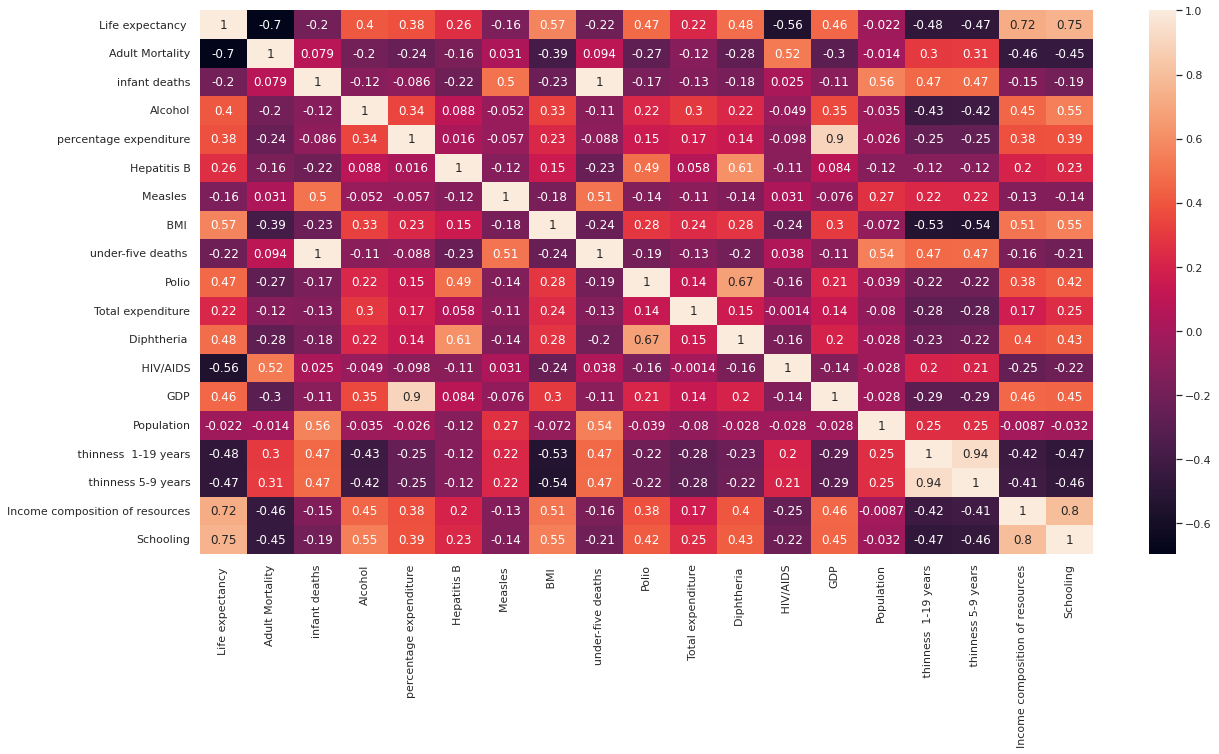

In [220]:
sns.set(rc = {'figure.figsize':(20,10)})
sns.heatmap(life_epxec_data.groupby(['Year','Country']).mean().corr(), annot=True);

Seen from the heat map, life expectancy seems to depend highly upon schooling and income composition of the resources, and upto some extent upon alcochol consumption, percentage expenditure, BMI and even polio!

In [221]:
life_epxec_data.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

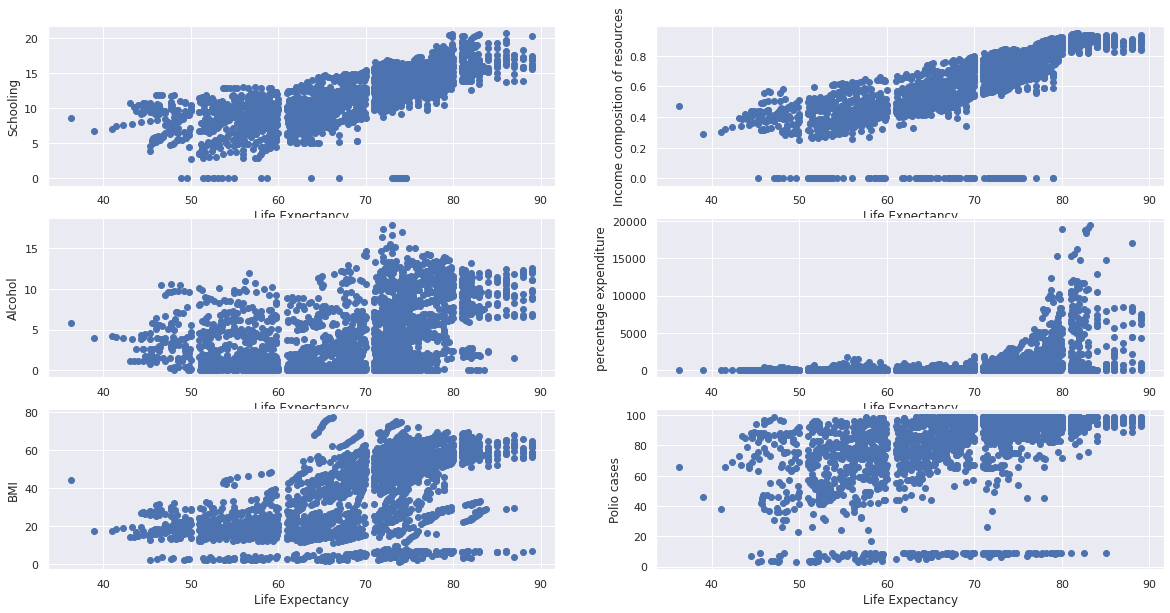

In [222]:
temp_df = life_epxec_data.groupby(['Year','Country']).mean().sort_values('Life expectancy ')
fig = plt.subplot(3,2,1)
plt.scatter(temp_df['Life expectancy '], temp_df['Schooling'])
plt.xlabel('Life Expectancy')
plt.ylabel('Schooling')
fig = plt.subplot(3,2,2)
plt.scatter(temp_df['Life expectancy '], temp_df['Income composition of resources'])
plt.xlabel('Life Expectancy')
plt.ylabel('Income composition of resources')
fig = plt.subplot(3,2,3)
plt.scatter(temp_df['Life expectancy '], temp_df['Alcohol'])
plt.xlabel('Life Expectancy')
plt.ylabel('Alcohol')
fig = plt.subplot(3,2,4)
plt.scatter(temp_df['Life expectancy '], temp_df['percentage expenditure'])
plt.xlabel('Life Expectancy')
plt.ylabel('percentage expenditure')
fig = plt.subplot(3,2,5)
plt.scatter(temp_df['Life expectancy '], temp_df[' BMI '])
plt.xlabel('Life Expectancy')
plt.ylabel('BMI')
fig = plt.subplot(3,2,6)
plt.scatter(temp_df['Life expectancy '], temp_df['Polio'])
plt.xlabel('Life Expectancy')
plt.ylabel('Polio cases')
plt.show()

* Schooling and Income composition of resources are clearly very much related to life expectancy
* There is no clear pattern for relation of life expectancy and alcohol consumption visually, but higher values of percentage expenditure is nicely correlated with life expectancy.
* I can't conclude anything from BMI and polio plot, as it is counter intuitive that high values of BMI and polio cases corresponds to higher life expectancy.

#### Selecting important features for predicting life expectancy

In [223]:
temp_df = life_epxec_data.copy(deep=True)
temp_df = temp_df.dropna()
temp_df = temp_df.drop(['Country','Status'],axis=1).reset_index()

**Using K-Fold CV**

In [224]:
# Using 'k' regions of data to train a rough model to estimate coefficients of different featuers
k = 10
data_len = len(temp_df)
validation_len = data_len//k
coeff_list = [] # list to store all learnt coefficients in different validation steps
for i in range(k):
    train = temp_df.loc[range(i*validation_len, (i+1)*validation_len), :]
    train_x = train.loc[:, train.columns!='Life expectancy ']
    train_y = train[['Life expectancy ']]
    
    model = linear_model.LinearRegression()
    model.fit(train_x, train_y)
    coeff_list += [model.coef_]

In [225]:
for i in range(len(coeff_list)):
    coeff_list[i]=coeff_list[i][0]
coeff_list = np.array(coeff_list)
coeff_list = coeff_list.T

# measuring distance of mean of each distribution of coefficiens w.r.t. its standard deviations

quality_metric = []
for i in range(len(coeff_list)):
    mu = coeff_list[i].mean()
    std = coeff_list[i].std()
    std = max(std, 1e-9)
    std_len = mu/std
    quality_metric += [abs(std_len)]

print('Distance of mean from zero in terms of standard deviation of its distribution\n')


l = [*enumerate(quality_metric)]
l.sort(key=lambda x:-x[1])
for i in range(len(l)):
    print(f'{train_x.columns[l[i][0]]}: {l[i][1]}')

Distance of mean from zero in terms of standard deviation of its distribution

Adult Mortality: 2.5773490110558517
percentage expenditure: 1.0851949311386766
 HIV/AIDS: 1.0302306549375093
Income composition of resources: 0.874642936033062
Year: 0.81652002369171
Schooling: 0.7510987349141091
Total expenditure: 0.6286341926006503
 BMI : 0.583041270344344
 thinness  1-19 years: 0.567774927863743
Diphtheria : 0.5326006642520554
Population: 0.5323879263846181
 thinness 5-9 years: 0.5078143175447464
Hepatitis B: 0.44010434025605094
Alcohol: 0.4166937766762502
GDP: 0.2215607799427932
Measles : 0.21227358692191742
Polio: 0.18497652522979938
index: 0.16650093198921792
infant deaths: 0.09893832185032068
under-five deaths : 0.015640202131278615


In [226]:
# Selecting top 3 features with most distant means

feature_index = []
for i in range(3):
    j = np.argmax(quality_metric)
    quality_metric[j] = -1
    feature_index += [j]

print('\nSelected Features:')
selected_features = train_x.columns[feature_index].tolist()
targets = ['Life expectancy ']
selected_features


Selected Features:


['Adult Mortality', 'percentage expenditure', ' HIV/AIDS']

**Using decision tree regressor**

In [227]:
from sklearn.tree import DecisionTreeRegressor
clf = DecisionTreeRegressor()
train_x = temp_df.loc[:, temp_df.columns!='Life expectancy '].drop(['index'],axis=1)
train_y = temp_df.loc[:, ['Life expectancy ']]
clf = clf.fit(train_x, train_y)

quality_metric = clf.feature_importances_

l = [*enumerate(quality_metric)]
l.sort(key=lambda x:-x[1])
for i in range(len(l)):
    print(f'{train_x.columns[l[i][0]]}: {l[i][1]}')

# Selecting top 3 features with most distant means

feature_index = []
for i in range(3):
    j = np.argmax(quality_metric)
    quality_metric[j] = -1
    feature_index += [j]

print('\nSelected Features:')
selected_features = train_x.columns[feature_index].tolist()
targets = ['Life expectancy ']
selected_features

Income composition of resources: 0.6764968471204397
Adult Mortality: 0.13091123261911725
 HIV/AIDS: 0.118219831725831
 thinness  1-19 years: 0.01684200292237846
Total expenditure: 0.009788004236629977
 thinness 5-9 years: 0.008125038331265624
Schooling: 0.007829795559276822
Year: 0.006317140881107517
Alcohol: 0.00497097821707508
 BMI : 0.004591762013071605
Measles : 0.0032707595608667734
Population: 0.0024303629244790243
Hepatitis B: 0.001901151526436811
GDP: 0.001797788091845999
infant deaths: 0.0016985728317876995
percentage expenditure: 0.0014954474410287177
under-five deaths : 0.0013205656880137806
Diphtheria : 0.001188356350021248
Polio: 0.0008043619593270547

Selected Features:


['Income composition of resources', 'Adult Mortality', ' HIV/AIDS']

**Lasso regularization***

In [228]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
model = Lasso()
# train_x = train_x.drop('index', axis=1)
search = GridSearchCV(Lasso(),
                      {'alpha':np.arange(0.1,10,0.1)},
                      cv = 5, scoring="neg_mean_squared_error",verbose=0
                      )
search.fit(train_x, train_y)
quality_metric = [abs(x) for x in search.best_estimator_.coef_]

l = [*enumerate(quality_metric)]
l.sort(key=lambda x:-x[1])
for i in range(len(l)):
    print(f'{train_x.columns[l[i][0]]}: {l[i][1]}')

# Selecting top 3 features with most distant means

feature_index = []
for i in range(len(quality_metric)):
    if quality_metric[i] > 0:
        feature_index += [i]

print('\nSelected Features:')
selected_features = train_x.columns[feature_index].tolist()
targets = ['Life expectancy ']
selected_features

/home/gauranshu/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.313e+03, tolerance: 9.853e+00

/home/gauranshu/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.232e+03, tolerance: 1.045e+01

/home/gauranshu/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.422e+03, tolerance: 1.101e+01

/

Schooling: 1.0361073854535168
 HIV/AIDS: 0.4105227447374415
infant deaths: 0.07937270080614638
under-five deaths : 0.060588268827659796
 BMI : 0.05355955932770147
 thinness  1-19 years: 0.02513177903377286
Diphtheria : 0.022404787919999846
Adult Mortality: 0.020579847411391405
Year: 0.018182160092133363
Polio: 0.009025931876733539
 thinness 5-9 years: 0.005965415340110373
Hepatitis B: 0.002502325113885133
percentage expenditure: 0.0002035701588154683
GDP: 6.871285238527094e-05
Measles : 1.6741419072108441e-06
Population: 6.472974732870397e-10
Alcohol: 0.0
Total expenditure: 0.0
Income composition of resources: 0.0

Selected Features:


/home/gauranshu/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.398e+04, tolerance: 1.275e+01



['Year',
 'Adult Mortality',
 'infant deaths',
 'percentage expenditure',
 'Hepatitis B',
 'Measles ',
 ' BMI ',
 'under-five deaths ',
 'Polio',
 'Diphtheria ',
 ' HIV/AIDS',
 'GDP',
 'Population',
 ' thinness  1-19 years',
 ' thinness 5-9 years',
 'Schooling']

**Using Ordinary Least Squares**

In [229]:
import statsmodels.api as sm
ols = sm.OLS(train_y, train_x).fit()
ols_summary = ols.summary()
print(ols_summary)

                                 OLS Regression Results                                
Dep. Variable:       Life expectancy    R-squared (uncentered):                   0.997
Model:                            OLS   Adj. R-squared (uncentered):              0.997
Method:                 Least Squares   F-statistic:                          3.239e+04
Date:                Sun, 21 Aug 2022   Prob (F-statistic):                        0.00
Time:                        18:15:59   Log-Likelihood:                         -4447.7
No. Observations:                1649   AIC:                                      8933.
Df Residuals:                    1630   BIC:                                      9036.
Df Model:                          19                                                  
Covariance Type:            nonrobust                                                  
                                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------

**Backward Selelction algorithm**

In [230]:
from sklearn.feature_selection import SequentialFeatureSelector
model = linear_model.LinearRegression()
sfs = SequentialFeatureSelector(model, n_features_to_select=3)
sfs.fit(train_x, train_y)
train_x.columns[sfs.get_support()]

Index(['Adult Mortality', ' HIV/AIDS', 'Income composition of resources'], dtype='object')

I tried 3 different methods for feature selection:<br>
1. K-fold Cross validation selected ['Adult Mortality', 'percentage expenditure', ' HIV/AIDS'] as its most significant features.
2. Decision tree regressor selected ['Income composition of resources', 'Adult Mortality', ' HIV/AIDS'] as its most significant features.
3. Decision tree regressor selected ['Adult Mortality', 'percentage expenditure', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population'] as its most significant features.
4. Ordinary Least Square method selected ['infant deaths' , 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles', 'under-five deaths', 'Polio'] as its most significant features.
5. Backward selection algorithm selected ['Adult Mortality', ' HIV/AIDS', 'Income composition of resources'] as its most significant features.

#### Distribution Analysis

**REFERENCE FROM:**
> https://towardsdatascience.com/comparing-sample-distributions-with-the-kolmogorov-smirnov-ks-test-a2292ad6fee5

In [231]:
from scipy import stats

In [232]:
# REFERENCE: https://towardsdatascience.com/comparing-sample-distributions-with-the-kolmogorov-smirnov-ks-test-a2292ad6fee5

# Cummulative distribution function
def cdf(sample, x, sort = False):
    if sort:
        sample.sort()
    cdf = sum(sample <= x)
    cdf = cdf / len(sample)
    return cdf

# Kolmogorov-Smirnov
def ks_norm(sample):
    sample.sort()
    D_ks = [] 
    for x in sample:
        cdf_normal = stats.norm.cdf(x = x, loc = 0, scale = 1)
        cdf_sample = cdf(sample = sample, x  = x)
        D_ks.append(abs(cdf_normal - cdf_sample))
    ks_stat = max(D_ks)
    p_value = stats.kstwo.sf(ks_stat, len(sample))
    return {"ks_stat": ks_stat, "p_value" : p_value}

In [233]:
col_distributions = {}
for col in train_x.columns:
    col_distributions[col] = ks_norm(gaussian_fit(train_x[col].values))
    
normally_distributed = [col for col in col_distributions if col_distributions[col]['p_value']>0.05]
not_normally_distributed = [col for col in col_distributions if col_distributions[col]['p_value']<=0.05]

print('Normally distributed metrics:\n')
for col in normally_distributed:
    print(f"{col}: ks = {col_distributions[col]['ks_stat']:.4f} (p-value = {col_distributions[col]['p_value']:.3e}, is normal = {col_distributions[col]['p_value'] > 0.05})")
print('\n'+'-'*80+'\n')
print('Non-normally distributed metrics:\n')
for col in not_normally_distributed:
    print(f"{col}: ks = {col_distributions[col]['ks_stat']:.4f} (p-value = {col_distributions[col]['p_value']:.3e}, is normal = {col_distributions[col]['p_value'] > 0.05})")

Normally distributed metrics:

Total expenditure: ks = 0.0328 (p-value = 5.651e-02, is normal = True)
Schooling: ks = 0.0258 (p-value = 2.198e-01, is normal = True)

--------------------------------------------------------------------------------

Non-normally distributed metrics:

Year: ks = 0.0726 (p-value = 5.404e-08, is normal = False)
Adult Mortality: ks = 0.0989 (p-value = 1.743e-14, is normal = False)
infant deaths: ks = 0.3193 (p-value = 5.076e-150, is normal = False)
Alcohol: ks = 0.1133 (p-value = 6.909e-19, is normal = False)
percentage expenditure: ks = 0.3425 (p-value = 3.436e-173, is normal = False)
Hepatitis B: ks = 0.2198 (p-value = 1.906e-70, is normal = False)
Measles : ks = 0.3845 (p-value = 6.951e-220, is normal = False)
 BMI : ks = 0.1151 (p-value = 1.769e-19, is normal = False)
under-five deaths : ks = 0.3155 (p-value = 2.066e-146, is normal = False)
Polio: ks = 0.2458 (p-value = 3.139e-88, is normal = False)
Diphtheria : ks = 0.2457 (p-value = 3.853e-88, is norma

#### Data Cleaning

In [240]:
# Selecting only required columns

class DataCleaning:
    def fit(self):pass
    def transform(self,df):
        df = life_epxec_data[['Life expectancy ', 'Adult Mortality', ' HIV/AIDS', 'Income composition of resources', 'Schooling']]
        df = df.dropna()
        df = df.reset_index()
        return df

In [241]:
df = DataCleaning().transform(life_epxec_data)
df.describe()

index  Life expectancy   Adult Mortality     HIV/AIDS  \
count  2768.000000       2768.000000      2768.000000  2768.000000   
mean   1451.066474         69.349566       163.041546     1.760766   
std     840.374910          9.360784       122.954439     5.187842   
min       0.000000         36.300000         1.000000     0.100000   
25%     756.750000         63.500000        73.000000     0.100000   
50%    1449.500000         72.200000       143.500000     0.100000   
75%    2179.250000         75.500000       225.000000     0.700000   
max    2937.000000         89.000000       723.000000    50.600000   

       Income composition of resources    Schooling  
count                      2768.000000  2768.000000  
mean                          0.627419    11.999639  
std                           0.210978     3.346440  
min                           0.000000     0.000000  
25%                           0.493000    10.100000  
50%                           0.677000    12.300000  
75%                           0.779250    14.300000  
max                           0.948000    20.700000

Judging by the description, no further outlier removal or missing value interpolation is required.

#### Data Scaling

In [242]:
# Transforming data

class Transform:
    def fit(self):pass
    def transform(self, df):
        data_scaler = {}
        for col in df.columns:
            data_scaler[col] = StandardScaler()
            data_scaler[col].fit(df[[col]].values)
        return data_scaler, df

#### Building a Pipeline

In [243]:
pipeline = Pipeline([
    ('cleaner', DataCleaning()),
    ('transform', Transform())
])

In [244]:
data_scaler, data = pipeline.transform(life_epxec_data)

#### K-Fold Cross Validation

In [245]:
k = 10
data_len = len(data)
validation_len = data_len//k
for i in range(k):
    test = data.loc[range(i*validation_len, (i+1)*validation_len), :]
    test_x = test.loc[:, test.columns!='Life expectancy ']
    test_y = test[['Life expectancy ']]
    train = data.loc[[*range(0,i*validation_len)]+[*range((i+1)*validation_len,data_len)], :]
    train_x = train.loc[:, train.columns!='Life expectancy ']
    train_y = train[['Life expectancy ']]

    model = linear_model.LinearRegression()
    model.fit(train_x, train_y)
    print(f'\nValidation set no.: {i+1}')
    print('Score:', model.score(test_x, test_y))
    print('Loss:', mean_squared_error(model.predict(test_x), test_y))


Validation set no.: 1
Score: 0.5829182664809576
Loss: 28.10905276734592

Validation set no.: 2
Score: 0.8174872368570147
Loss: 21.532123981148498

Validation set no.: 3
Score: 0.7899578520322097
Loss: 14.295430512000776

Validation set no.: 4
Score: 0.784522784699408
Loss: 19.31870161316779

Validation set no.: 5
Score: 0.8138008788290544
Loss: 11.128911724611376

Validation set no.: 6
Score: 0.81664872615209
Loss: 18.403885340024786

Validation set no.: 7
Score: 0.7588824493542297
Loss: 22.610434780633362

Validation set no.: 8
Score: 0.7055701039049203
Loss: 19.965225237842287

Validation set no.: 9
Score: 0.7824478394304071
Loss: 21.414888436242812

Validation set no.: 10
Score: 0.735914471441199
Loss: 16.03306131431334
